In [2]:
import pandas as pd

In [28]:
data_path = "./Data/melb_data.csv"
data = pd.read_csv(data_path)
analysis = data.describe()
analysis

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


#### Interpreting Data Description
The results show 8 numbers for each column in your original dataset. The first number, the count, shows how many rows have non-missing values.

Missing values arise for many reasons. For example, the size of the 2nd bedroom wouldn't be collected when surveying a 1 bedroom house. We'll come back to the topic of missing data.

The second value is the mean, which is the average. Under that, std is the standard deviation, which measures how numerically spread out the values are.

To interpret the min, 25%, 50%, 75% and max values, imagine sorting each column from lowest to highest value. The first (smallest) value is the min. If you go a quarter way through the list, you'll find a number that is bigger than 25% of the values and smaller than 75% of the values. That is the 25% value (pronounced "25th percentile"). The 50th and 75th percentiles are defined analogously, and the max is the largest number.

In [32]:
analysis.Price[0]

13580.0

### Simple graphical analysis

> Price dependency on various parameteres

In [109]:
import matplotlib.pyplot as plt

## clean the data
data = data.dropna()
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


In [51]:
## Based on no of Rooms avarage prices
data.query('Rooms == 1')

avg_room_prices = {}
for i in range(1, 9):
    qry = f'Rooms == {i}'
    prices = data.query(qry)['Price']
    avg_room_prices[i] = round(sum(prices)/len(prices))

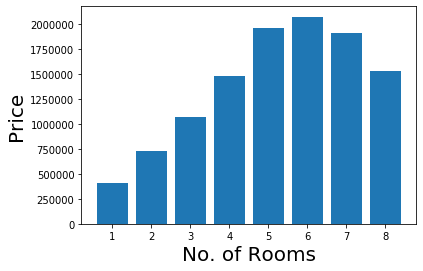

In [69]:
## plotting the avarage prices
font1 = {'size':20}
## * for tuple unpacking
## ** for dictionary unpaching
plt.bar(*zip(*avg_room_prices.items()))
plt.xlabel('No. of Rooms', fontdict=font1)
plt.ylabel('Price', fontdict=font1)
plt.show()

In [105]:
## Based on the year built

years = set(data['YearBuilt'])
print(max(years))
avg_year_prices = {}
for i in years:
    qry = f'YearBuilt == {round(i)}'
    prices = data.query(qry)['Price']
    avrg = round(sum(prices)/len(prices))
    avg_year_prices[round(i)] = avrg
        


2018.0


Text(0, 0.5, ' Avarage Price')

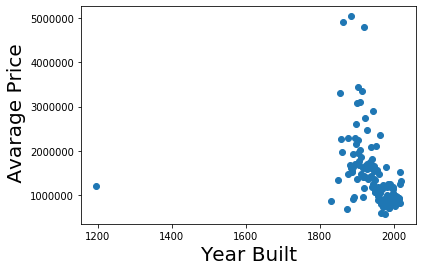

In [104]:
## plotting avarage prices
plt.scatter(*zip(*avg_year_prices.items()))
plt.xlabel('Year Built', fontdict=font1)
plt.ylabel(' Avarage Price', fontdict=font1)

In [113]:
data_subset = data[list(data.columns)]
data_subset

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.00,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.00,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12205,Whittlesea,30 Sherwin St,3,h,601000.0,S,Ray,29/07/2017,35.5,3757.0,...,2.0,1.0,972.0,149.00,1996.0,Whittlesea,-37.51232,145.13282,Northern Victoria,2170.0
12206,Williamstown,75 Cecil St,3,h,1050000.0,VB,Williams,29/07/2017,6.8,3016.0,...,1.0,0.0,179.0,115.00,1890.0,Hobsons Bay,-37.86558,144.90474,Western Metropolitan,6380.0
12207,Williamstown,2/29 Dover Rd,1,u,385000.0,SP,Williams,29/07/2017,6.8,3016.0,...,1.0,1.0,0.0,35.64,1967.0,Hobsons Bay,-37.85588,144.89936,Western Metropolitan,6380.0
12209,Windsor,201/152 Peel St,2,u,560000.0,PI,hockingstuart,29/07/2017,4.6,3181.0,...,1.0,1.0,0.0,61.60,2012.0,Stonnington,-37.85581,144.99025,Southern Metropolitan,4380.0


In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [120]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


In [150]:
x = data.groupby(['Address'])

6117

In [151]:
x.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.00,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.00,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12205,Whittlesea,30 Sherwin St,3,h,601000.0,S,Ray,29/07/2017,35.5,3757.0,...,2.0,1.0,972.0,149.00,1996.0,Whittlesea,-37.51232,145.13282,Northern Victoria,2170.0
12206,Williamstown,75 Cecil St,3,h,1050000.0,VB,Williams,29/07/2017,6.8,3016.0,...,1.0,0.0,179.0,115.00,1890.0,Hobsons Bay,-37.86558,144.90474,Western Metropolitan,6380.0
12207,Williamstown,2/29 Dover Rd,1,u,385000.0,SP,Williams,29/07/2017,6.8,3016.0,...,1.0,1.0,0.0,35.64,1967.0,Hobsons Bay,-37.85588,144.89936,Western Metropolitan,6380.0
12209,Windsor,201/152 Peel St,2,u,560000.0,PI,hockingstuart,29/07/2017,4.6,3181.0,...,1.0,1.0,0.0,61.60,2012.0,Stonnington,-37.85581,144.99025,Southern Metropolitan,4380.0


# Prioritising the data

In [152]:
melb_file_path = "./Data/melb_data.csv"
melb_data = pd.read_csv(melb_file_path)

In [155]:
## Get all the columns
melb_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [158]:
## Remove rows for which data is unavailable
melb_data = melb_data.dropna(axis=0)

In [159]:
## Select the data need to be predicted in variable Y
## in our case it is Price
y = melb_data.Price

*We select multiple features by providing a list of column names inside brackets. Each item in that list should be a string (with quotes).*

In [161]:
## Feature given by list of columns
melb_features = ["Rooms", "Bathroom", "Landsize", "Lattitude", "Longtitude"]

## This data is called X
X = melb_data[melb_features]

In [162]:
## Describe the data
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [163]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954



## Building Your Model
You will use the **scikit-learn** library to create your models. When coding, this library is written as **sklearn**, as you will see in the sample code. Scikit-learn is easily the most popular library for modeling the types of data typically stored in DataFrames.


#### The steps to building and using a model are:
- **Define**: What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.
- **Fit**: Capture patterns from provided data. This is the heart of modeling.
- **Predict**: Just what it sounds like
- **Evaluate**: Determine how accurate the model's predictions are

In [179]:
## import libraries
from sklearn.tree import DecisionTreeRegressor

## define the model
model = DecisionTreeRegressor(random_state=1)

## fit the model
model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [180]:
## predict the model for some data
print(f'Predicting the data for first 5 data : {X.head()}')
predictions = model.predict(X.head())
print(predictions)

Predicting the data for first 5 data :    Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
[1035000. 1465000. 1600000. 1876000. 1636000.]


In [181]:
## Evaluate the predictions
actual = y.head()
corrects = 0

for (i,j) in zip(actual, predictions):
    if i == j:
        corrects+=1
Error = len(actual) - corrects
print(f"Error : {Error}")

Error : 0


> There are many metrics for summarizing model quality, but we'll start with one called Mean Absolute Error (also called MAE). Let's break down this metric starting with the last word, error.

- The prediction error for each house is: 

```python
    error = actual−predicted
```
So, if a house cost 150,000 and you predicted it would cost 100,000 the error is 50,000.

- With the MAE metric, we take the absolute value of each error. This converts each error to a positive number. We then take the average of those absolute errors. This is our measure of model quality. In plain English, it can be said as

- On average, our predictions are off by about X.
To calculate MAE, we first need a model. That is built in a hidden cell below, which you can review by clicking the code button.

In [182]:
## evaluating the model by MAE matrix for validation
from sklearn.metrics import mean_absolute_error

In [183]:
predicted_home_price = model.predict(X)

In [184]:
mean_absolute_error(y, predicted_home_price)

1115.7467183128902

### The Problem with "In-Sample" Scores
The measure we just computed can be called an "in-sample" score. We used a single "sample" of houses for both building the model and evaluating it. Here's why this is bad.

Imagine that, in the large real estate market, door color is unrelated to home price.

However, in the sample of data you used to build the model, all homes with green doors were very expensive. The model's job is to find patterns that predict home prices, so it will see this pattern, and it will always predict high prices for homes with green doors.

Since this pattern was derived from the training data, the model will appear accurate in the training data.

But if this pattern doesn't hold when the model sees new data, the model would be very inaccurate when used in practice.

Since models' practical value come from making predictions on new data, we measure performance on data that wasn't used to build the model. The most straightforward way to do this is to exclude some data from the model-building process, and then use those to test the model's accuracy on data it hasn't seen before. This data is called **validation data**.

> Splitting the data into train test testsplit will be a good way

**sklearn provaides a built in function for this process called train_test_split**
- split is based on random number generation.
- The random arguement to get same split on data eachtime we run

In [185]:
## splitting the data
from sklearn.model_selection import train_test_split

In [186]:
## split 
train_X, val_X, train_Y, val_Y = train_test_split(X, y, random_state=0)

In [187]:
## defining the model
melb_model_1 = DecisionTreeRegressor()

## fit the model
melb_model_1.fit(train_X, train_Y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [189]:
## get predictions
predictions = melb_model_1.predict(val_X)

## evaluate the model
print(mean_absolute_error(val_Y, predictions))

275032.12717882503


# Overfitting and undrfitting

At the end of this step, you will understand the concepts of underfitting and overfitting, and you will be able to apply these ideas to make your models more accurate.

Experimenting With Different Models
Now that you have a reliable way to measure model accuracy, you can experiment with alternative models and see which gives the best predictions. But what alternatives do you have for models?

You can see in scikit-learn's documentation that the decision tree model has many options (more than you'll want or need for a long time). The most important options determine the tree's depth. Recall from the first lesson in this course that a tree's depth is a measure of how many splits it makes before coming to a prediction. This is a relatively shallow tree

Depth 2 Tree

In practice, it's not uncommon for a tree to have 10 splits between the top level (all houses) and a leaf. As the tree gets deeper, the dataset gets sliced up into leaves with fewer houses. If a tree only had 1 split, it divides the data into 2 groups. If each group is split again, we would get 4 groups of houses. Splitting each of those again would create 8 groups. If we keep doubling the number of groups by adding more splits at each level, we'll have  210
2
10
  groups of houses by the time we get to the 10th level. That's 1024 leaves.

When we divide the houses amongst many leaves, we also have fewer houses in each leaf. Leaves with very few houses will make predictions that are quite close to those homes' actual values, but they may make very unreliable predictions for new data (because each prediction is based on only a few houses).

This is a phenomenon called overfitting, where a model matches the training data almost perfectly, but does poorly in validation and other new data. On the flip side, if we make our tree very shallow, it doesn't divide up the houses into very distinct groups.

At an extreme, if a tree divides houses into only 2 or 4, each group still has a wide variety of houses. Resulting predictions may be far off for most houses, even in the training data (and it will be bad in validation too for the same reason). When a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data, that is called underfitting.



In [1]:
## importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

In [12]:
## define the function for calculating mae on diffarent set of nodes
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):    
    ## define the model
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    
    ## fit the model to the data
    model.fit(train_X, train_y)
    
    ## get the predictions
    predictions = model.predict(val_X)
    
    ## evaluate
    mae = mean_absolute_error(predictions, val_y)
    
    return mae
    

In [13]:
## loading the data
melb_data_path = r"./Data/melb_data.csv"
melb_data = pd.read_csv(melb_data_path)

## filter data
## drop Nan rows
filtered_data = melb_data.dropna(axis=0)

#assign y (data need to be predicted)
y = filtered_data.Price

## select only required features for training and validation
features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude']
X = filtered_data[features]

In [16]:
## Split data to trai and test splits
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

In [45]:
## compare MAE with diffarent value of max_leaf_nodes
error_data = []
for max_leaf_nodes in range(5, 5000, 100):
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    error_data.append([max_leaf_nodes, my_mae])
    print(f"Max Leaf Nodes : {max_leaf_nodes}\t\tMaen Absolute Error : {my_mae}")

Max Leaf Nodes : 5		Maen Absolute Error : 347380.33833344496
Max Leaf Nodes : 105		Maen Absolute Error : 248332.4152934942
Max Leaf Nodes : 205		Maen Absolute Error : 249988.4707029457
Max Leaf Nodes : 305		Maen Absolute Error : 244598.17584101018
Max Leaf Nodes : 405		Maen Absolute Error : 243169.06557796831
Max Leaf Nodes : 505		Maen Absolute Error : 243565.81489047495
Max Leaf Nodes : 605		Maen Absolute Error : 244032.84906635052
Max Leaf Nodes : 705		Maen Absolute Error : 243239.13099931108
Max Leaf Nodes : 805		Maen Absolute Error : 244139.03015982558
Max Leaf Nodes : 905		Maen Absolute Error : 246480.9116913047
Max Leaf Nodes : 1005		Maen Absolute Error : 247250.61876633685
Max Leaf Nodes : 1105		Maen Absolute Error : 248573.7047821386
Max Leaf Nodes : 1205		Maen Absolute Error : 249116.87393752646
Max Leaf Nodes : 1305		Maen Absolute Error : 249680.4639490621
Max Leaf Nodes : 1405		Maen Absolute Error : 250575.7392170379
Max Leaf Nodes : 1505		Maen Absolute Error : 251562.229757

In [46]:
ex = np.asarray(error_data)

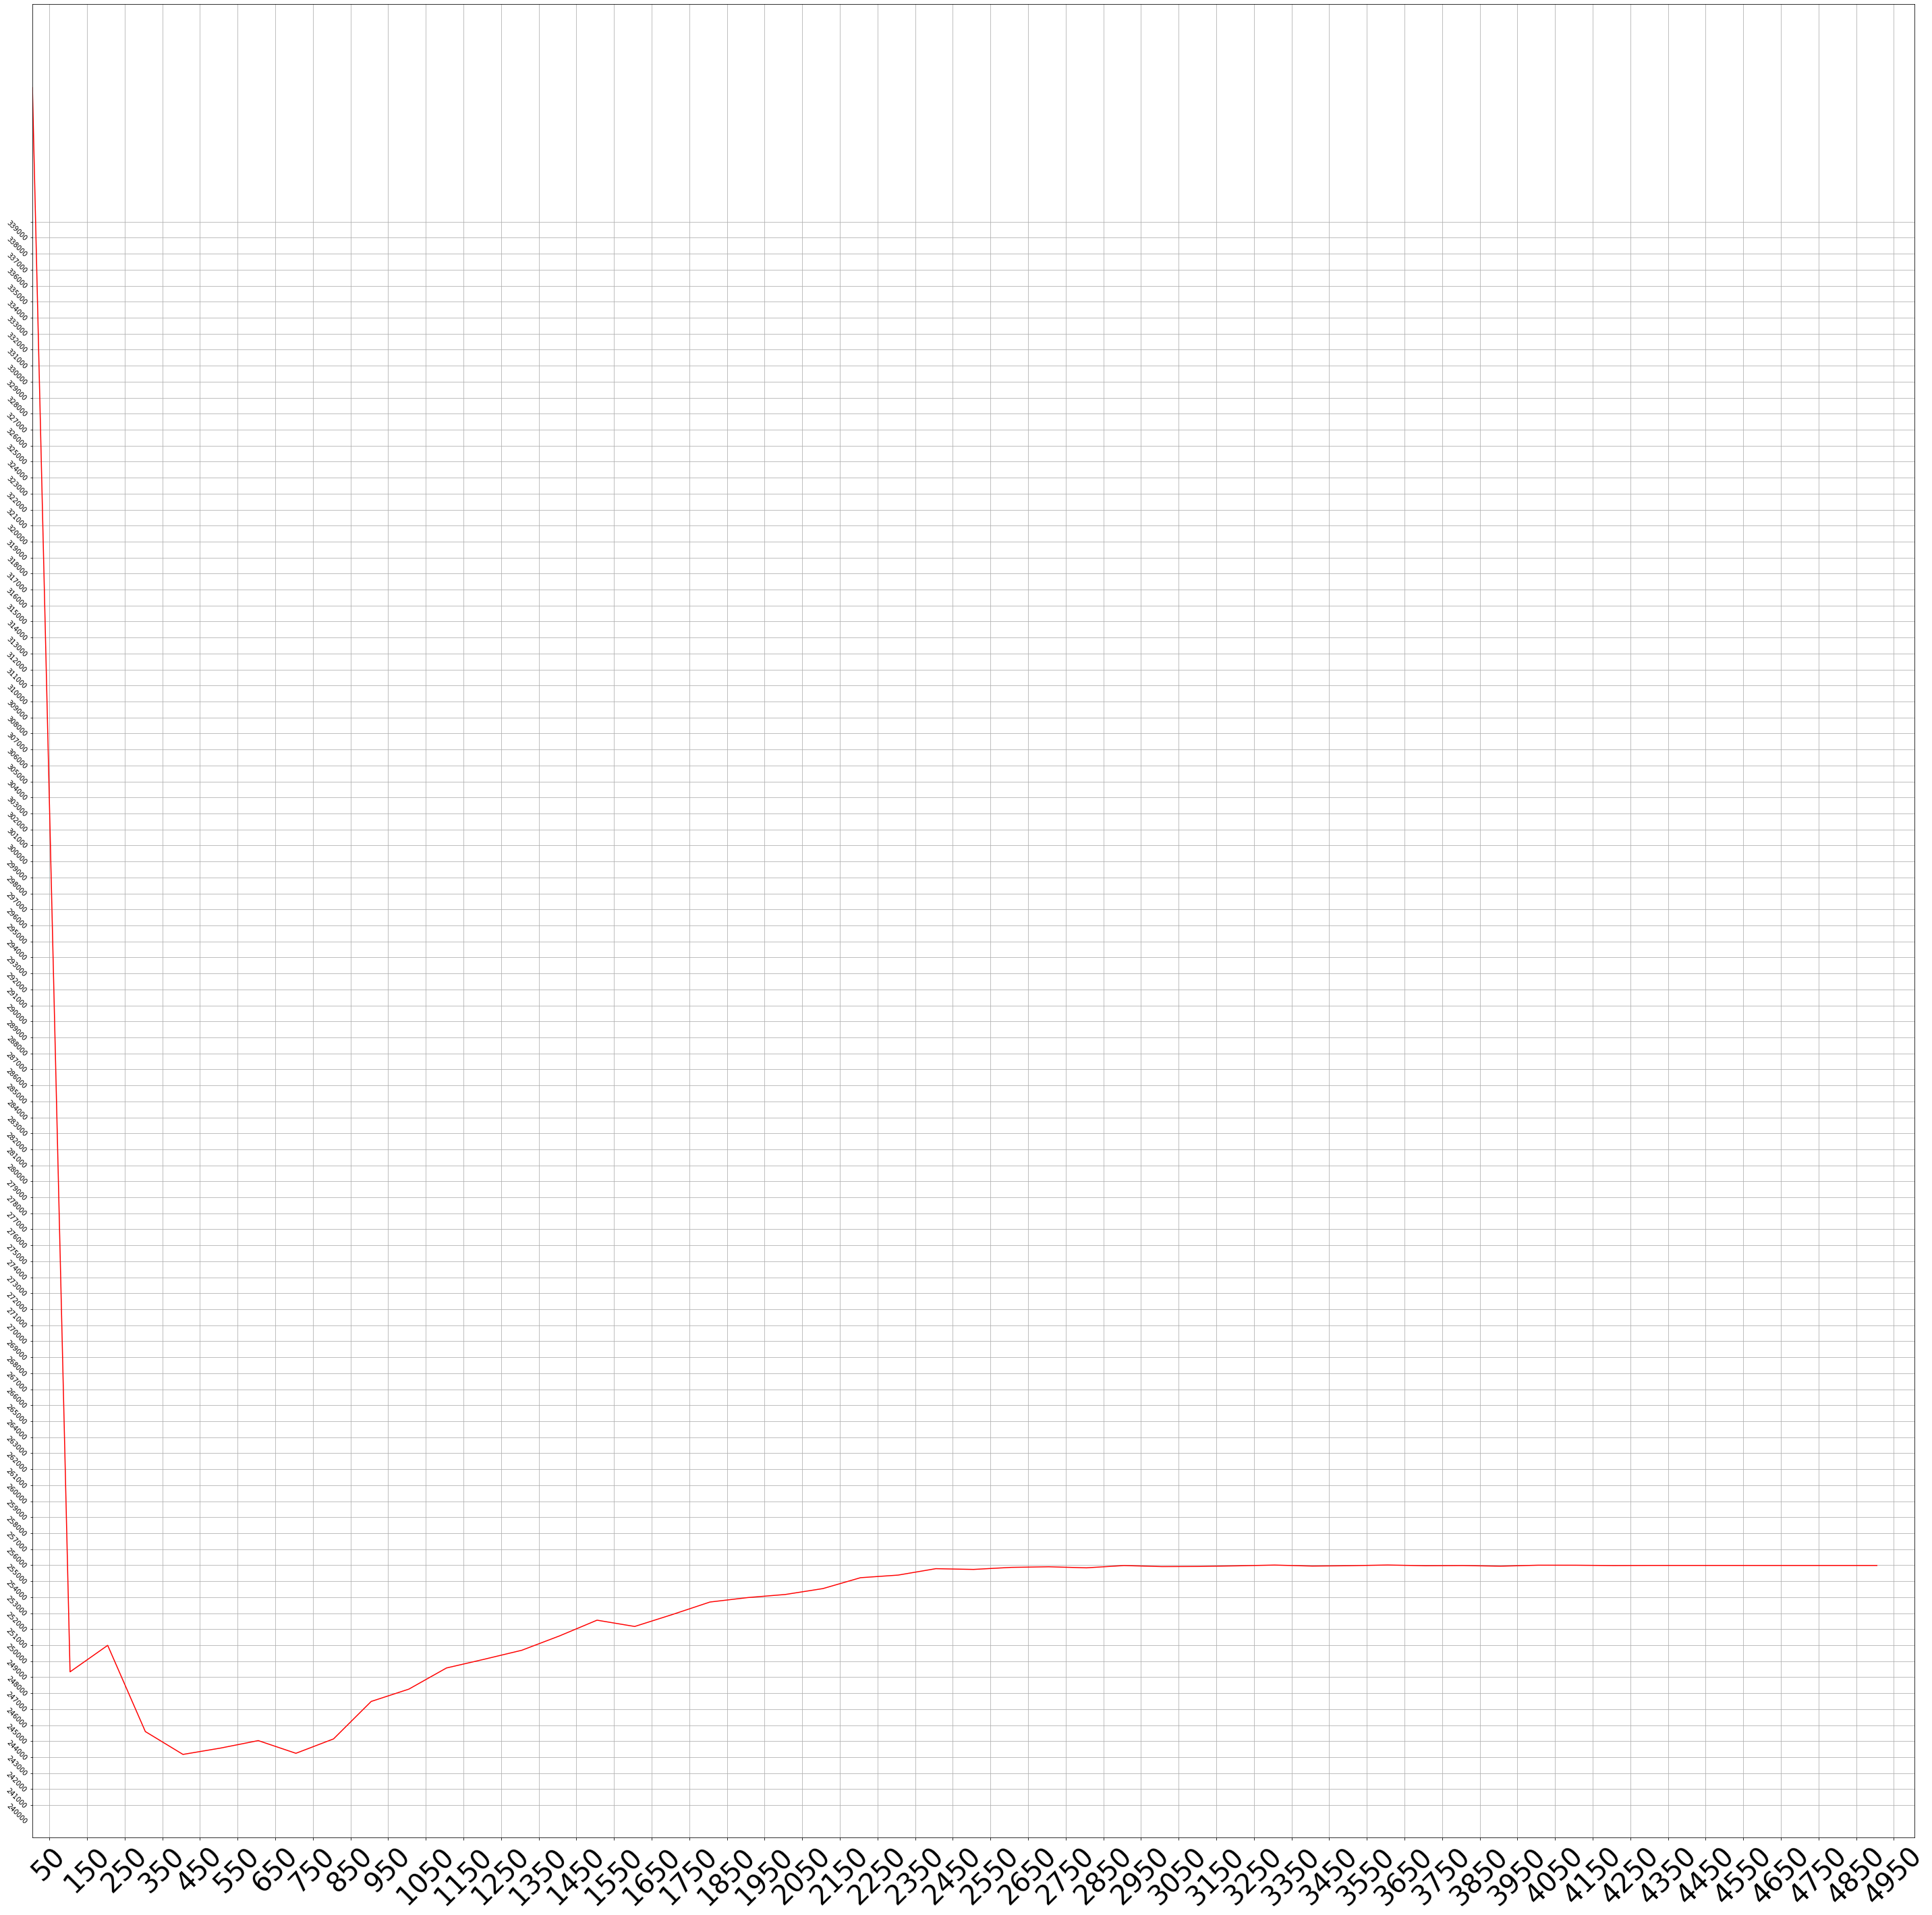

In [68]:

fig = plt.figure(figsize=(50,50))
font = {'size':20}
plt.plot(ex[:,0], ex[:,1], color='r')
plt.xticks(np.arange(50, 5000+5, 100), fontsize=40, rotation=45, )
plt.yticks(np.arange(240000, 340000, 1000), fontsize=10, rotation=-45)
plt.xlim([5, 5000+5])
plt.grid()
plt.show()

#### Of the minimum error at nodes = 405 or value 243169.06557796831

In [54]:
(min(ex[:, 1]))

243169.06557796831

In [55]:
ls = list(ex[:, 1])

In [56]:
ls.index(243169.06557796831)

4

In [59]:
ex[4, 0]

405.0

### Conclusion
Here's the takeaway: Models can suffer from either:

- Overfitting: capturing spurious patterns that won't recur in the future, leading to less accurate predictions, or
- Underfitting: failing to capture relevant patterns, again leading to less accurate predictions.
We use validation data, which isn't used in model training, to measure a candidate model's accuracy. This lets us try many candidate models and keep the best one.